# 🗾 Exploratory Data Analysis of the Heart Faliure Prediction Dataset

The [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) is a publicly available dataset which is a collection of clinical data used to predict the presence of heart disease.


## 🎯 Main Objective

Our main objective will be to find out which features affect the most in case of heart disease using EDA techniques like `Univariate`, `Bivariate`, and `Multivariate` analysis.


## 1. 📁 All the necessary imports


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2. 📂 Load the dataset


In [2]:
df = pd.read_csv("dataset.csv")

## 3. 🔎 Explore the dataset


In [3]:
# first few rows

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# last few rows

df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
# shape of the dataset (row, column)

df.shape

(918, 12)

In [6]:
# column names

df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
# data types of the columns

df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [8]:
# summary of the dataset

df.describe(include="all")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


## 4. 🫙 Check for missing values


In [9]:
# are there missing values in any column?

df.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

-   Since there are no missing values in this dataset, we do not have to impute any values.


## 5. 💹 Univariate analysis

Checking only one column or feature at a time


### i. Number of patients with and without heart disease


In [10]:
# 1 = patient has heart disease
# 0 = patient doesn't have heart disease

df["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

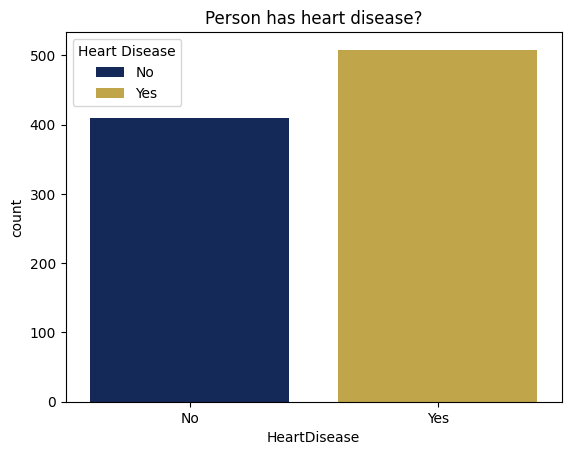

In [11]:
ax = sns.countplot(
    x="HeartDisease", data=df, palette=["#0A2463", "#D4AF37"], hue="HeartDisease"
)
plt.title("Person has heart disease?")

ax.set_xticks([0, 1])
ax.set_xticklabels(["No", "Yes"])

plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

-   We can see that about 400 patients doesn't have `heart disease` and about 500 patients have `heart disease`.


### ii. Number of male and female patients in this dataset


In [12]:
df["Sex"].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

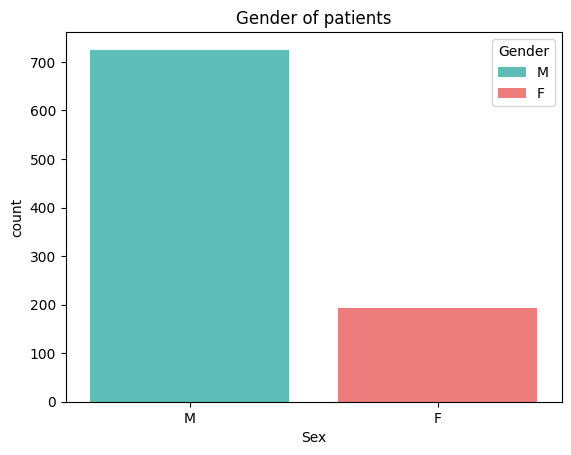

In [13]:
sns.countplot(x="Sex", data=df, palette=["#4ECDC4", "#FF6B6B"], hue="Sex")
plt.title("Gender of patients")
plt.legend(title="Gender", labels=["M", "F"])
plt.show()

-   We can see that there are significantly more number of `male` patients than `female` patients.


### iii. Patient's age group


In [14]:
# number of unique ages

df["Age"].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71],
      dtype=int64)

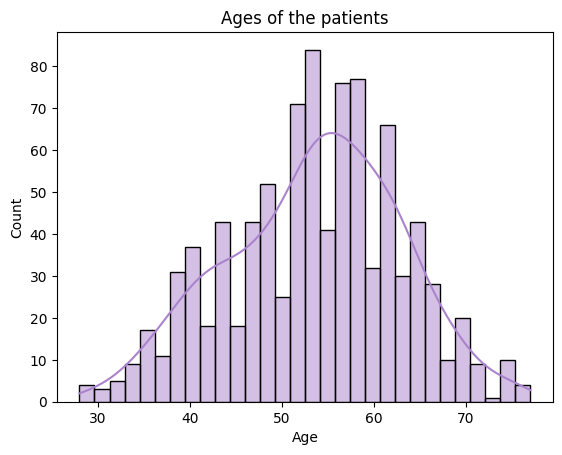

In [15]:
sns.histplot(data=df, x="Age", color="#AA83CC", bins=30, kde=True)
plt.title("Ages of the patients")
plt.show()

-   We can see that most of the patients are in the **50-60** `age` group.


### iv. Patient's resting blood pressure


In [16]:
# number of unique blood pressure entries

df["RestingBP"].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
       102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
       129, 164], dtype=int64)

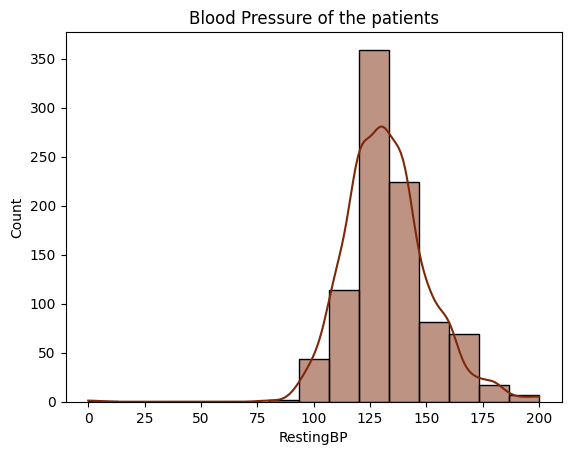

In [17]:
sns.histplot(data=df, x="RestingBP", color="#7D2809", bins=15, kde=True)
plt.title("Blood Pressure of the patients")
plt.show()

-   We can see that majority of patients have their `blood pressure` in the range **125-150**.


### v. Chest pain type in patients


In [18]:
# number of patients with a certain type of chest pain

df["ChestPainType"].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

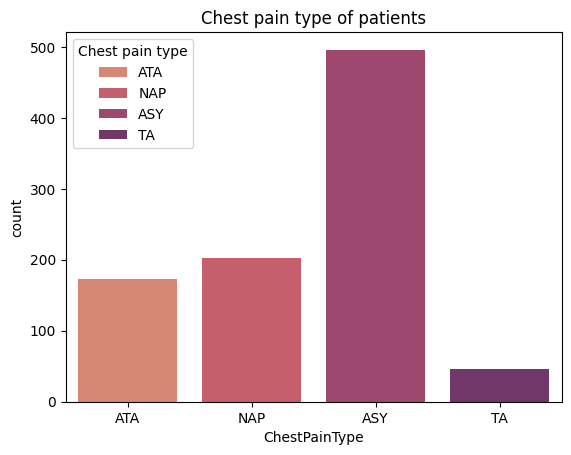

In [19]:
sns.countplot(data=df, x="ChestPainType", palette="flare", hue="ChestPainType")
plt.title("Chest pain type of patients")
plt.legend(
    title="Chest pain type", loc="upper left", labels=["ATA", "NAP", "ASY", "TA"]
)
plt.show()

-   We can see that majority of patients hvae `Asymptomatic (ASY)` chest pain.


## 6. 📚 Bivariate analysis

Checking how two features are related


### i. Gender and Heart Disease

Let's see how the `Gender` of a patient affects their possibility of having `Heart disease`


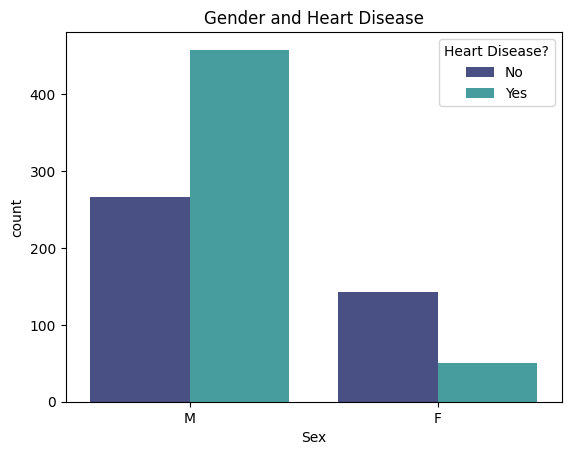

In [20]:
sns.countplot(data=df, x="Sex", hue="HeartDisease", palette="mako")
plt.title("Gender and Heart Disease")
plt.legend(title="Heart Disease?", labels=["No", "Yes"])
plt.show()

-   We can see that `male` patients have more tendency into having `heart disease`.


### ii. Chest pain type and Heart Disease

Let's see how the type of `Chest pain` of a patient affects their possibility of having `Heart disease`


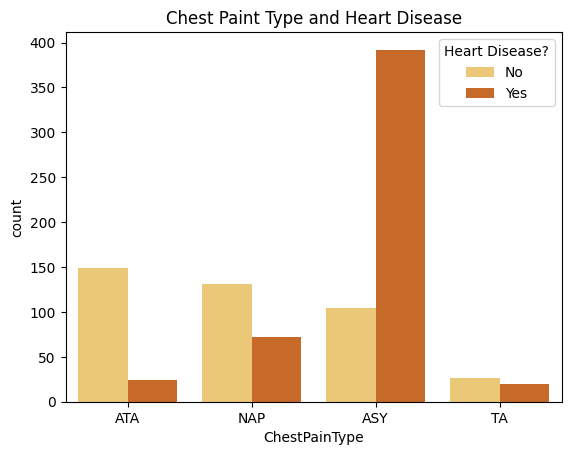

In [21]:
sns.countplot(data=df, x="ChestPainType", hue="HeartDisease", palette="YlOrBr")
plt.title("Chest Paint Type and Heart Disease")
plt.legend(title="Heart Disease?", labels=["No", "Yes"])
plt.show()

-   We can see that patients with `Asymptomatic (ASY)` pain have a much higher chance of getting `Heart disease`.


### iii. Blood pressure and Heart Disease

Let's see how the `Blood pressure` of a patient affects their possibility of having `Heart disease`


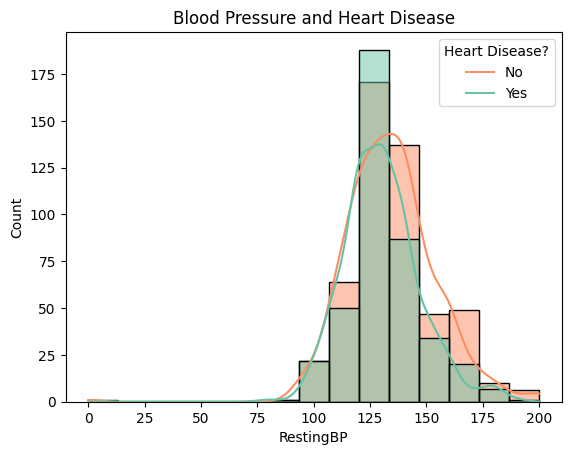

In [22]:
sns.histplot(
    data=df, x="RestingBP", hue="HeartDisease", palette="Set2", bins=15, kde=True
)
plt.title("Blood Pressure and Heart Disease")
plt.legend(title="Heart Disease?", labels=["No", "Yes"])
plt.show()

-   We can see that patients with a `Blood pressure` of around 125 to 140 has a higher chance of getting `Heart disease`.


### iv. Blood sugar and Heart Disease

Let's see how the `Blood sugar` level of a patient affects their possibility of having `Heart disease`


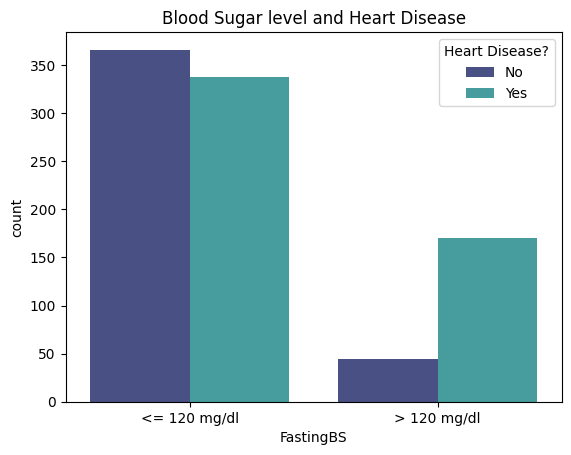

In [23]:
ax = sns.countplot(data=df, x="FastingBS", hue="HeartDisease", palette="mako")
plt.title("Blood Sugar level and Heart Disease")

ax.set_xticks([0, 1])
ax.set_xticklabels(["<= 120 mg/dl", "> 120 mg/dl"])

plt.legend(title="Heart Disease?", labels=["No", "Yes"])
plt.show()

-   We can clearly see that patients with more than 120 mg/dl `Blood sugar` have a higher chance of getting `Heart disease`.


### v. Cholesterol and Heart Disease

Let's see how the `Cholesterol` level of a patient affects their possibility of having `Heart disease`


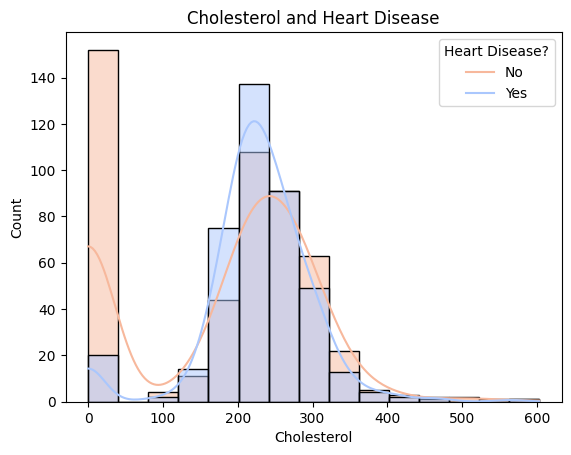

In [24]:
sns.histplot(
    data=df, x="Cholesterol", hue="HeartDisease", palette="coolwarm", bins=15, kde=True
)
plt.title("Cholesterol and Heart Disease")
plt.legend(title="Heart Disease?", labels=["No", "Yes"])
plt.show()

-   We can see that patients with `Cholesterol` in the range of around 100 to 300 have a higher chance of having `Heart disease`.


## 7. 📊 Multivariate analysis

Checking how more than two features are related


### i. Blood sugar, Chest pain type and Heart disease

Let's see how `Blood sugar` and `Chest pain` type of a patient affects the possibily of `Heart disease`


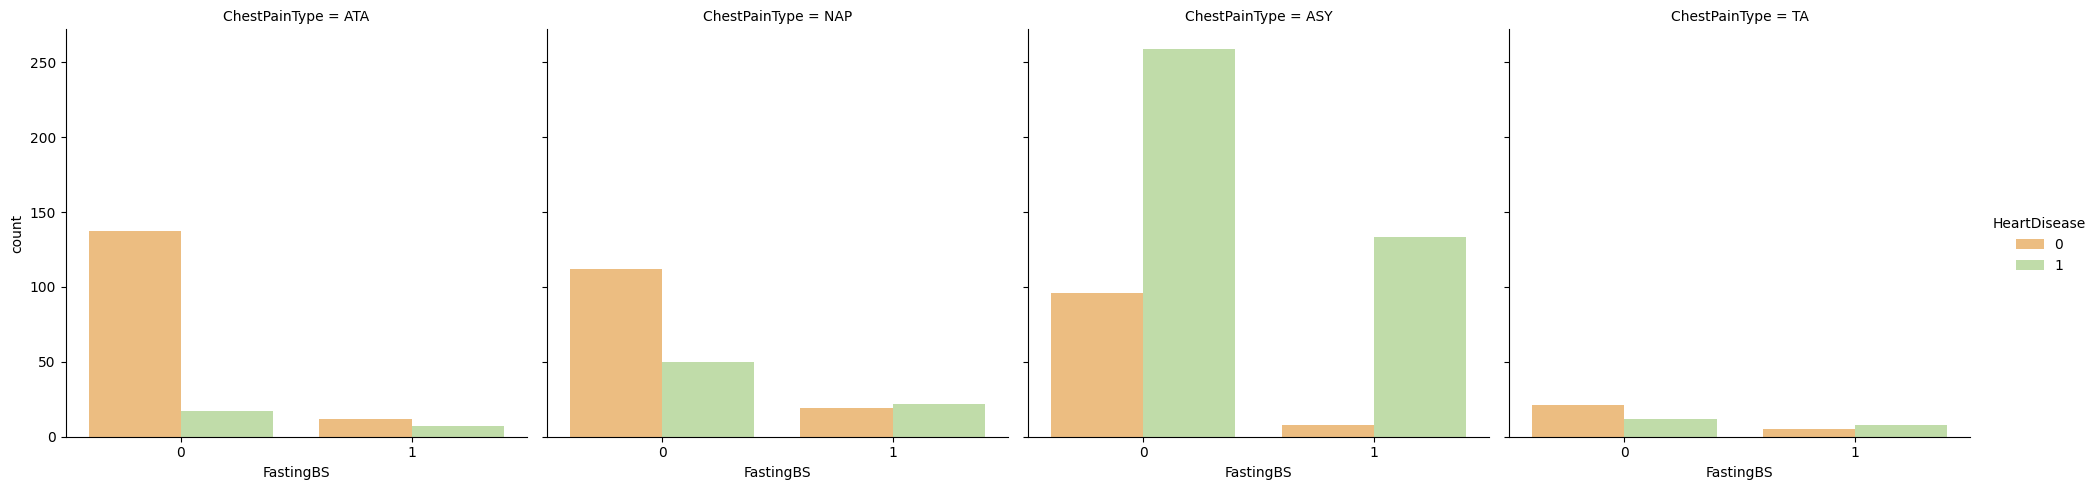

In [25]:
sns.catplot(
    data=df,
    x="FastingBS",
    col="ChestPainType",
    hue="HeartDisease",
    kind="count",
    palette="Spectral",
)
plt.show()

-   Patients with `Asymptomatic (ASY)` pain and `Blood sugar` level higher than 120 mg/dl have the highest chance of having `Heart disease`.


### ii. ECG, Angina induced by exercise and Heart disease

Let's see how `ECG` results and `Angina` induced by exercise affects the possibily of `Heart disease`


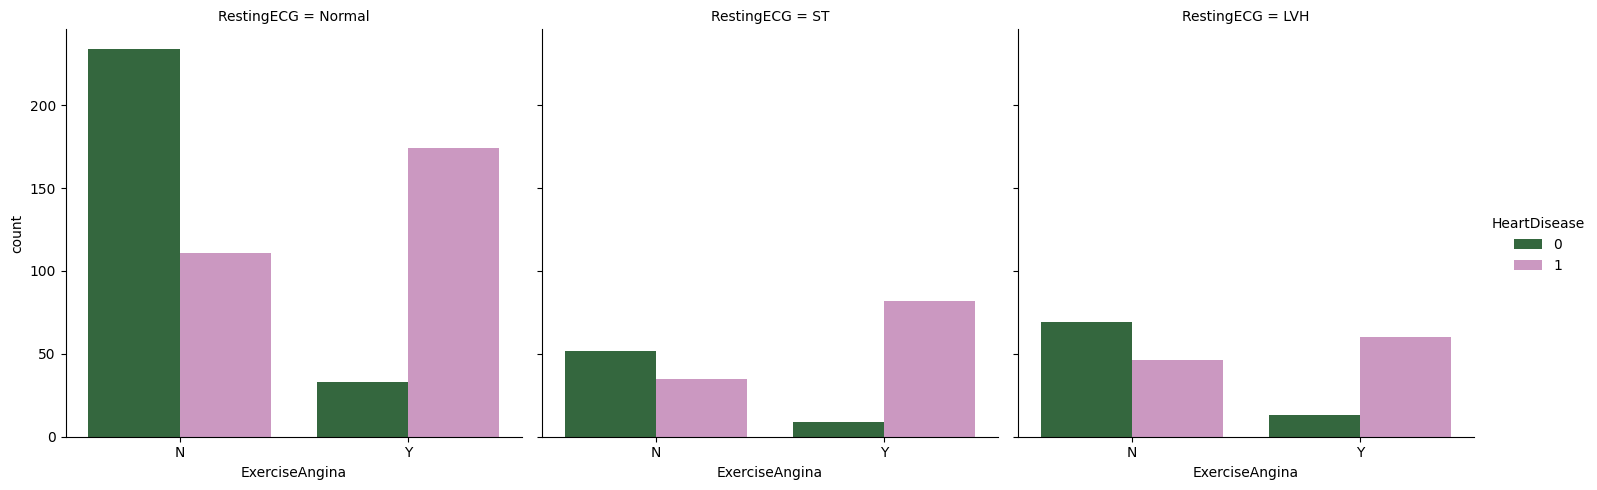

In [26]:
sns.catplot(
    data=df,
    x="ExerciseAngina",
    col="RestingECG",
    hue="HeartDisease",
    kind="count",
    palette="cubehelix",
)
plt.show()

-   Patients with `ECG` results as `ST` and `Angina` induced by exercise have the higest chance of having `Heart disease` among the rest.


### iii. Gender, Chest Pain type, Angina induced by exercise and Heart disease

Let's see how the `Gender`, type of `Chest Pain` and `Angina` induced by exercise affects the possibily of `Heart disease`


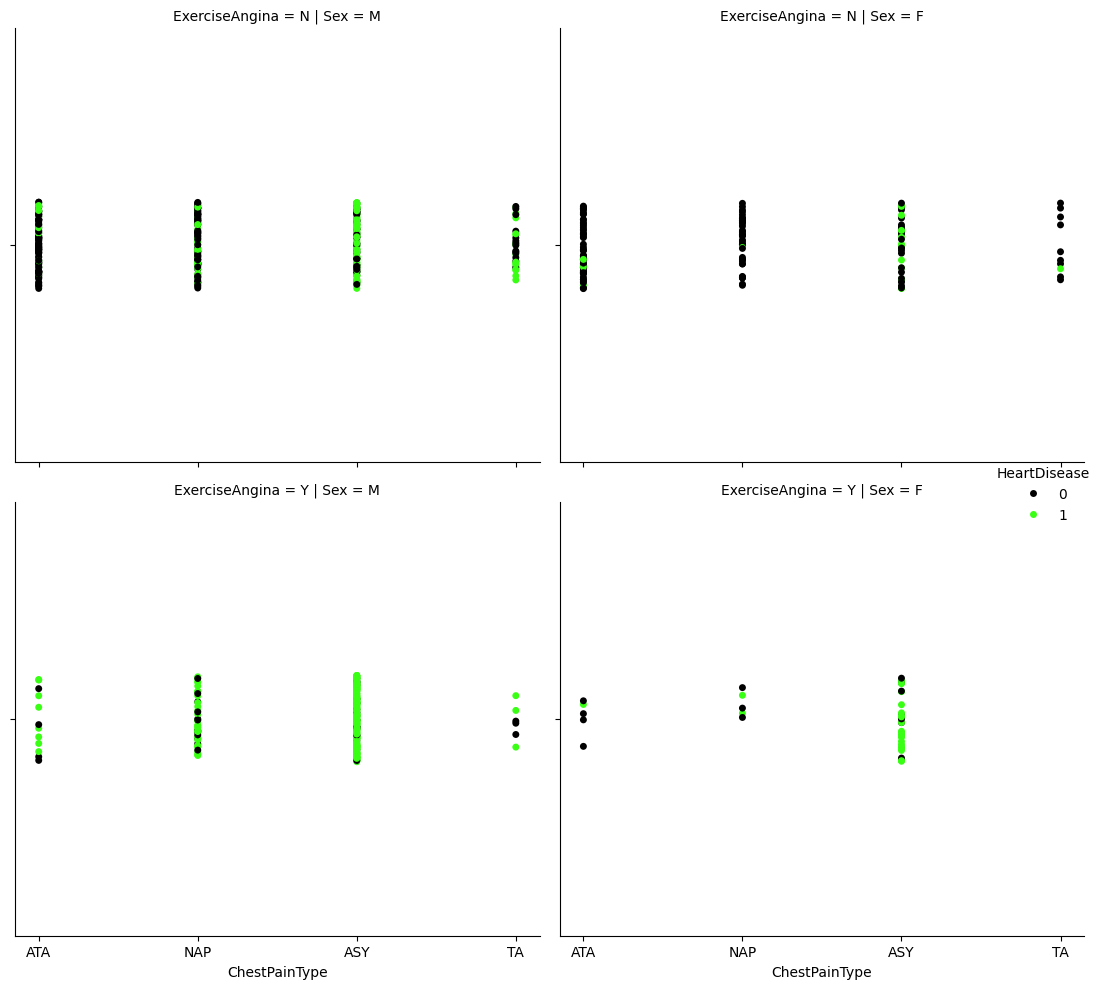

In [27]:
sns.catplot(
    data=df,
    x="ChestPainType",
    col="Sex",
    row="ExerciseAngina",
    hue="HeartDisease",
    palette=["#000000", "#39FF14"],
)
plt.tight_layout()
plt.show()

-   This plot shows us that `Male` patients who have `Asymptomatic (ASY)` pain and have `Angina` while exercising have the most chance of having `Heart Disease`


### iv. All pair of features

Using `seaborn.pairplot()`, we'll see all pairs of features into plots for numerical features.


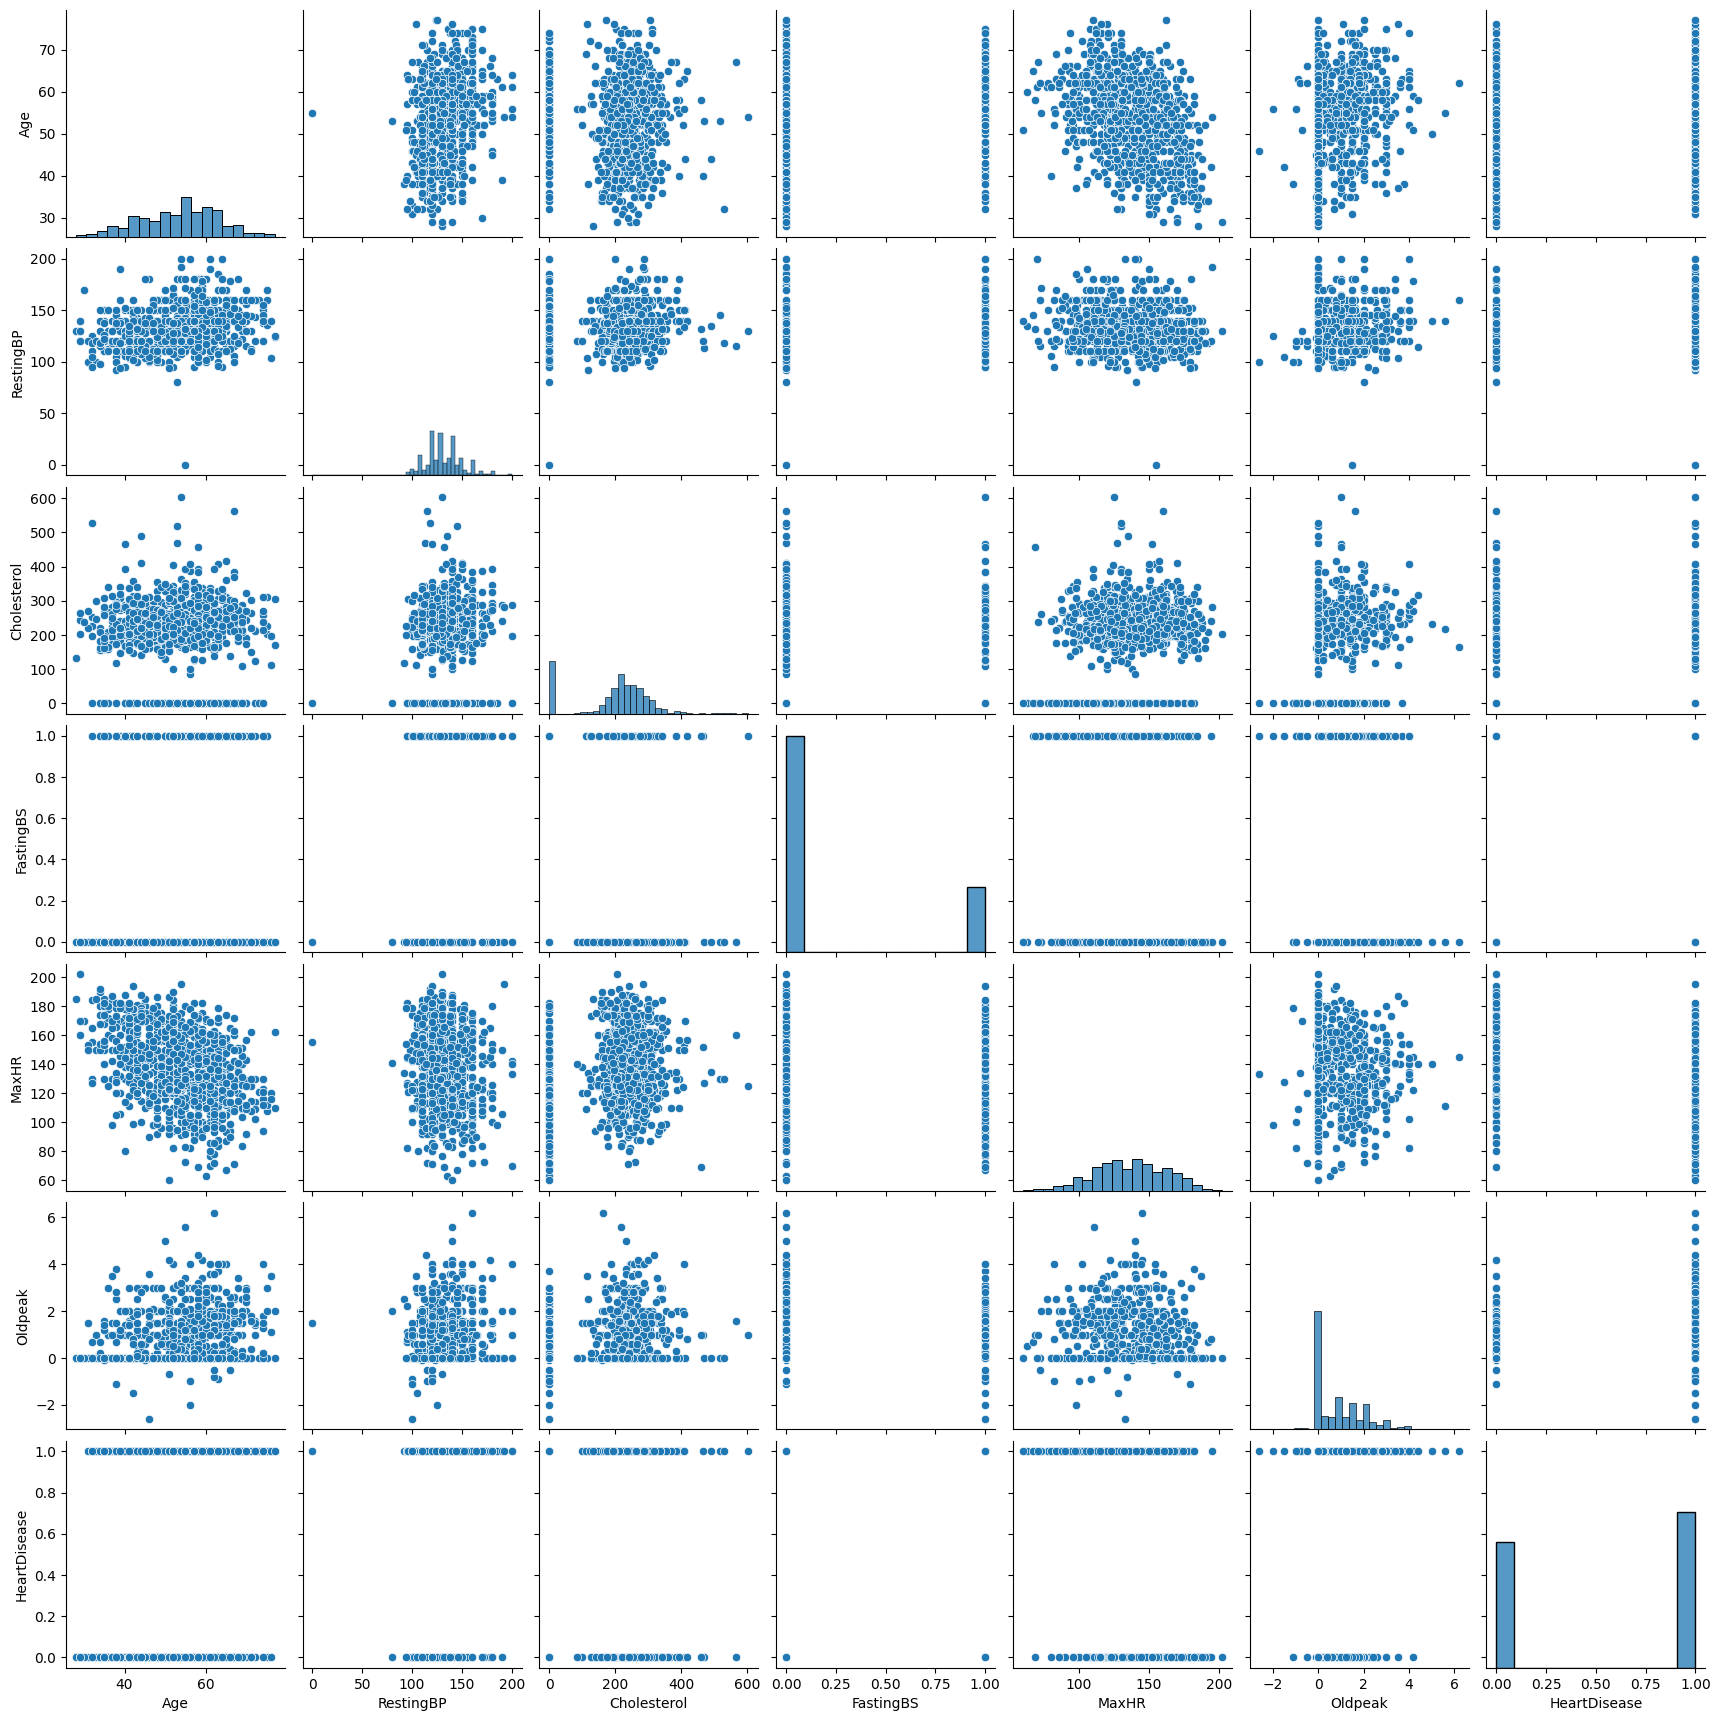

In [28]:
sns.pairplot(data=df)

## 8. 🗺️ Correlation Heatmap

Using Pearson's correlation algorithm, let's see the heatmap


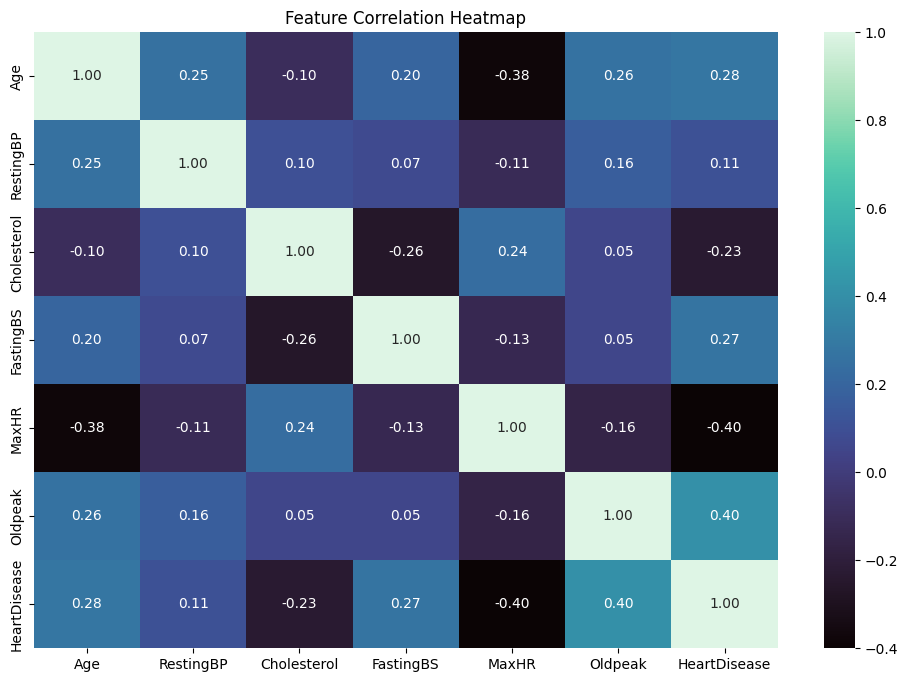

In [29]:
plt.figure(figsize=(12, 8))
numeric_features = df.select_dtypes(include=np.number)
sns.heatmap(numeric_features.corr(), annot=True, cmap="mako", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

-   As we can see, there exist both positive and negetive correlations between different pasirs of features.
-   The maximum positive correlation is between `Oldpeak` and `HeartDisease`.
-   The maximum negetive correlation is between `MaxHR` and `HeartDisease`.
-   The minimum correlation pairs are:
    -   `Cholesterol` and `Oldpeak`
    -   `FastingBS` and `Oldpeak`
